In [1]:
import sys
sys.path.append("..")

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import mbrl.planning as planning

%load_ext autoreload
%autoreload 2

%matplotlib inline
mpl.rcParams['figure.facecolor'] = 'white'

In [2]:
def rosenbrock_fn(x_array, a=1., b=100.):
    n, d = x_array.shape
    assert d % 2 == 0
    val = 0
    for i in range(d // 2):
        x = x_array[:, 2 * i]
        y = x_array[:, 2 * i + 1]
        val += (a - x) ** 2 + b * (y - (x ** 2)) ** 2
    return -val

In [3]:
cem = planning.CEMOptimizer(100, 0.05, 1000, 3.0)
best, history = cem.optimize(rosenbrock_fn, (2,))
best_value = rosenbrock_fn(best.reshape((1, -1)))

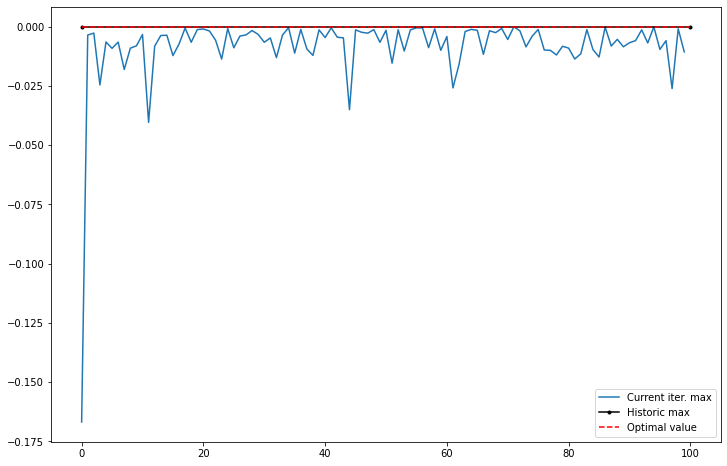

In [4]:
plt.figure(figsize=(12, 8))
plt.plot(history["value_maxs"])
plt.plot([0, 100], [best_value, best_value], 'k.-')
plt.plot([0, 100], [0, 0], 'r--')
plt.legend(["Current iter. max", "Historic max", "Optimal value"])
plt.show()

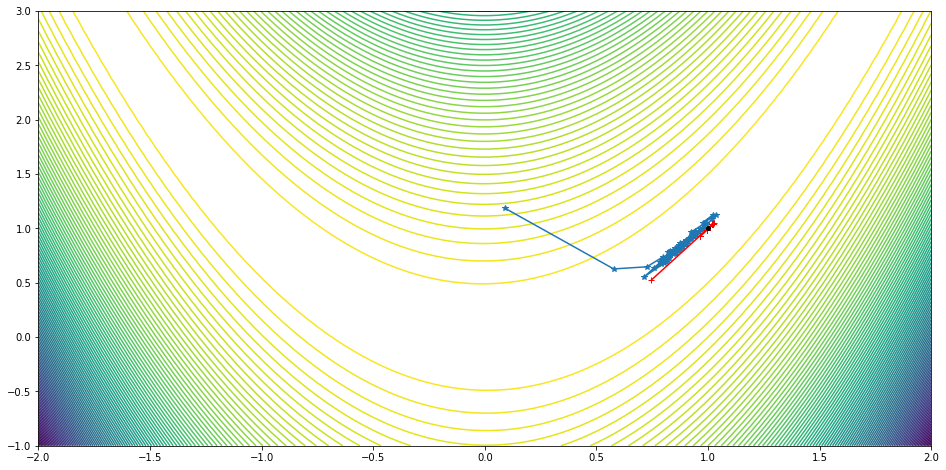

In [5]:
n = 100
x1 = np.linspace(-2, 2, n) 
x2 = np.linspace(-1, 3, n)
x1s, x2s = np.meshgrid(x1, x2)
x = np.stack([x1s.flatten(), x2s.flatten()]).transpose()
z = rosenbrock_fn(x)
z = z.reshape((n, n))

mu1 = [x[0] for x in history["mus"]]
mu2 = [x[1] for x in history["mus"]]

best1 = [x[0] for x in history["best_xs"]]
best2 = [x[1] for x in history["best_xs"]]

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
ax.contour(x1s, x2s, z, levels=100)
ax.plot(mu1, mu2, '*-')
ax.plot(best1, best2, '+-r')
ax.plot(1, 1, 'ok', markersize=4)
plt.show()